In [1]:
# data => Social_Network_Ads.csv

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [11]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25,
                                                   stratify= y)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [19]:
log = LogisticRegression()
dt = DecisionTreeClassifier(random_state= 0)
nb = GaussianNB()
svc = SVC(kernel= 'rbf')
rf = RandomForestClassifier(random_state = 0)

In [21]:
# fit
log.fit(x_train, y_train)
dt.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC()

In [25]:
# pred on test
y_pred_log = log.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_svc = svc.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [31]:
# accuracy score
print("log=>", accuracy_score(y_test, y_pred_log))
print("dt=>", accuracy_score(y_test, y_pred_dt))
print("nb=>", accuracy_score(y_test, y_pred_nb))
print("svc=>", accuracy_score(y_test, y_pred_svc))

log=> 0.81
dt=> 0.84
nb=> 0.85
svc=> 0.89


In [34]:
# stacking


In [36]:
from sklearn.ensemble import StackingClassifier

In [38]:
stack = StackingClassifier(estimators=[('logistic', log),
                                      ('decision tree', dt),
                                      ('naive bayes', nb),
                                      ('svc', svc)],
                          final_estimator= RandomForestClassifier(random_state= 42))

In [40]:
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('decision tree',
                                DecisionTreeClassifier(random_state=0)),
                               ('naive bayes', GaussianNB()), ('svc', SVC())],
                   final_estimator=RandomForestClassifier(random_state=42))

In [42]:
y_pred_final = stack.predict(x_test)

In [44]:
accuracy_score(y_test, y_pred_final)

0.88

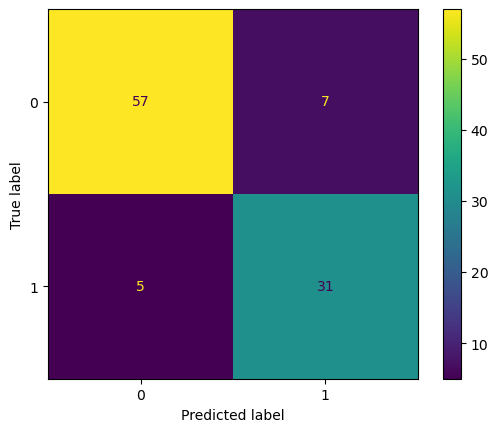

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final);

### Voting

In [53]:
from sklearn.ensemble import VotingClassifier

In [55]:
voting = VotingClassifier(estimators= [('logistic', log),
                                      ('decision tree', dt),
                                      ('naive bayes', nb),
                                      ('svc', svc),
                                      ('rf', RandomForestClassifier(random_state=42))])

In [57]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('naive bayes', GaussianNB()), ('svc', SVC()),
                             ('rf', RandomForestClassifier(random_state=42))])

In [61]:
y_pred_vot = voting.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred_vot)

0.88

In [ ]:
adityathakare72@gmail.com

https://mitu.co.in/download